<a href="https://colab.research.google.com/github/MariaMitka/Bitcoin-vs-Tradinional-Stocks-Returns-and-Risk-Analysis/blob/main/group_50_deliverable_1_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ΜΕΜ264-ΕΦΑΡΜΟΣΜΕΝΗ ΣΤΑΤΙΣΤΙΚΗ
# 1ο ΠΑΡΑΔΟΤΕΟ

Στο παρόν αρχείο παρουσιάζονται οι κώδικες σε Python που χρησιμοποιήσαμε για να μπορέσουμε να επεξεργαστούμε τα δεδομένα μας και να κάνουμε μια πρώτη αρχή για την τελική εργασία μας.
    

Εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε και ανεβάζουμε τα csv αρχεία με τα dataset (τα οποία αντλήσαμε από το Yahoo finance) μας και τα επεξεργαζόμαστε για περαιτέρω ανάλυση.

In [ ]:
import pandas as pd
from pandas.plotting import table
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns



btc = pd.read_csv('Bitcoin_data.csv', skiprows=[1,2])
btc.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date', inplace=True)
#print(btc.head())

sp500 = pd.read_csv('S&P_500_data.csv', skiprows=[1,2])
sp500.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

ete = pd.read_csv('ETE_data.csv', skiprows=[1,2])
ete.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ete['Date'] = pd.to_datetime(ete['Date'])
ete.set_index('Date', inplace=True)

Κάνουμε την περιγραφική στατιστική με τη μέθοδο describe() και παρουσιάζουμε τα διαγράμματα της πορείας του Adjusted Close στον χρόνο για κάθε ένα περιουσιακό στοιχείο.


 Summary Table Generated by .describe() Method:

 Descriprive Statistic for Bitcoin


,Adj Close,Close,High,Low,Open,Volume
count,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1.916000e+03
mean,38974.187982,38974.187982,39780.282120,38048.337751,38937.255062,3.369732e+10
std,23933.195178,23933.195178,24423.990946,23382.653499,23925.180293,1.986761e+10
min,4970.788086,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,20180.612305,20180.612305,20523.783691,19696.081055,20162.276855,2.075331e+10
50%,34665.109375,34665.109375,35495.093750,33517.386719,34658.189453,3.020112e+10
75%,56316.095703,56316.095703,57901.187500,54479.529297,56331.904297,4.083442e+10
max,106146.265625,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11



 Descriprive Statistic for S&P500


,Adj Close,Close,High,Low,Open,Volume
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1.317000e+03
mean,4333.077252,4333.077252,4357.959483,4305.247841,4332.604618,4.401059e+09
std,824.094486,824.094486,823.175025,825.179706,824.488563,1.040896e+09
min,2237.399902,2237.399902,2300.729980,2191.860107,2290.709961,1.639500e+09
25%,3830.850098,3830.850098,3862.850098,3805.590088,3839.489990,3.762940e+09
50%,4258.490234,4258.490234,4280.470215,4220.339844,4255.279785,4.147890e+09
75%,4709.850098,4709.850098,4738.569824,4694.390137,4714.229980,4.754840e+09
max,6144.149902,6144.149902,6147.430176,6111.149902,6134.500000,9.976520e+09



 Descriprive Statistic for ETE


,Adj Close,Close,High,Low,Open,Volume
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1.301000e+03
mean,4.106850,4.277433,4.336567,4.212603,4.270832,3.034917e+06
std,2.377847,2.383979,2.400411,2.358024,2.375190,6.546291e+06
min,0.771795,0.842000,0.898000,0.815000,0.880000,1.362380e+05
25%,2.273221,2.480000,2.520000,2.445000,2.490000,1.338234e+06
50%,3.339198,3.490000,3.509000,3.429000,3.470000,2.073566e+06
75%,6.075617,6.350000,6.430000,6.250000,6.350000,3.302014e+06
max,10.290000,10.290000,10.290000,10.160000,10.220000,1.844475e+08


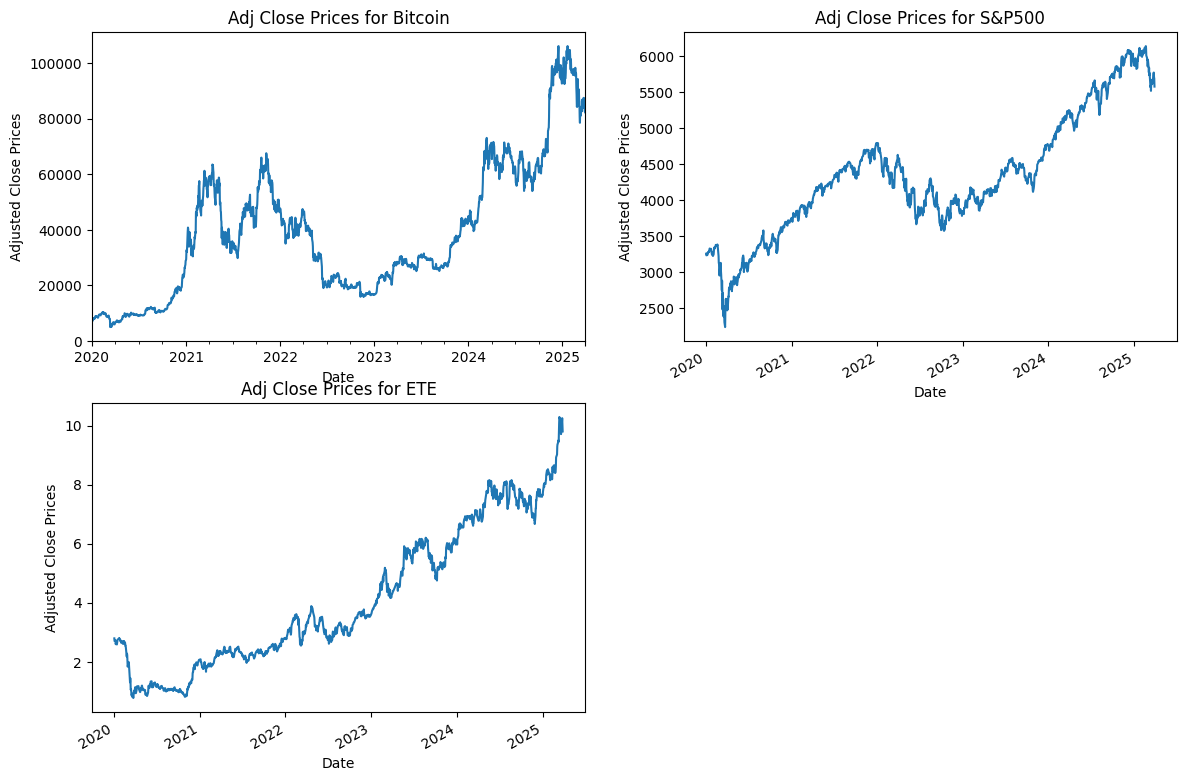

In [ ]:
print("\n Summary Table Generated by .describe() Method:")
print("\n Descriprive Statistic for Bitcoin")
display(btc.describe())
print("\n Descriprive Statistic for S&P500")
display(sp500.describe())
print("\n Descriprive Statistic for ETE")
display(ete.describe())

plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
btc['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.title("Adj Close Prices for Bitcoin")
plt.subplot(2,2,2)
sp500['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.title("Adj Close Prices for S&P500")
plt.subplot(2,2,3)
ete['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.title("Adj Close Prices for ETE")
#plt.savefig("Adj_Close_Prices.png")
plt.show()

Υπολογίζουμε ημερίσιες/μηνιαίες/ετήσιες αποδόσεις(Return) του κάθε περιουσιακού στοιχείου. Η απόδοση υπολογίζεται ως $${R_t} =  \frac{P_t - P_{t-1}}{P_{t-1}}$$ όπου ${R_t}$ η απόδοση του χρονικού κβάντου t, ${P_t}$ & $ {P_{t-1}}$ η προσαρμοσμένη τιμή κλεισίματος της τελευταίας μέρας διαπραγμάτευσης.
Στο διάγραμμα γραμμής και το Q-Q plot παρουσιάζουμε τις μηνιαίες αποδόσεις και στο bar plot τις ετήσιες.


 Daily Return (Bitcoin):
              Adj Close  Daily Return
Date                                 
2020-01-02  6985.470215     -0.029819
2020-01-03  7344.884277      0.051452
2020-01-04  7410.656738      0.008955
2020-01-05  7411.317383      0.000089
2020-01-06  7769.219238      0.048291

 Daily Return (S&P500):
              Adj Close  Daily Return
Date                                 
2020-01-03  3234.850098     -0.007060
2020-01-06  3246.280029      0.003533
2020-01-07  3237.179932     -0.002803
2020-01-08  3253.050049      0.004902
2020-01-09  3274.699951      0.006655

 Daily Return (ETE):
            Adj Close  Daily Return
Date                               
2020-01-03   2.699450     -0.032841
2020-01-07   2.722365      0.008489
2020-01-08   2.594038     -0.047138
2020-01-09   2.632536      0.014841
2020-01-10   2.613287     -0.007312

 Monthly Return Bitcoin:
Date
2020-01-31    0.298653
2020-02-29   -0.084465
2020-03-31   -0.248037
2020-04-30    0.310556
2020-05-31    0.0672

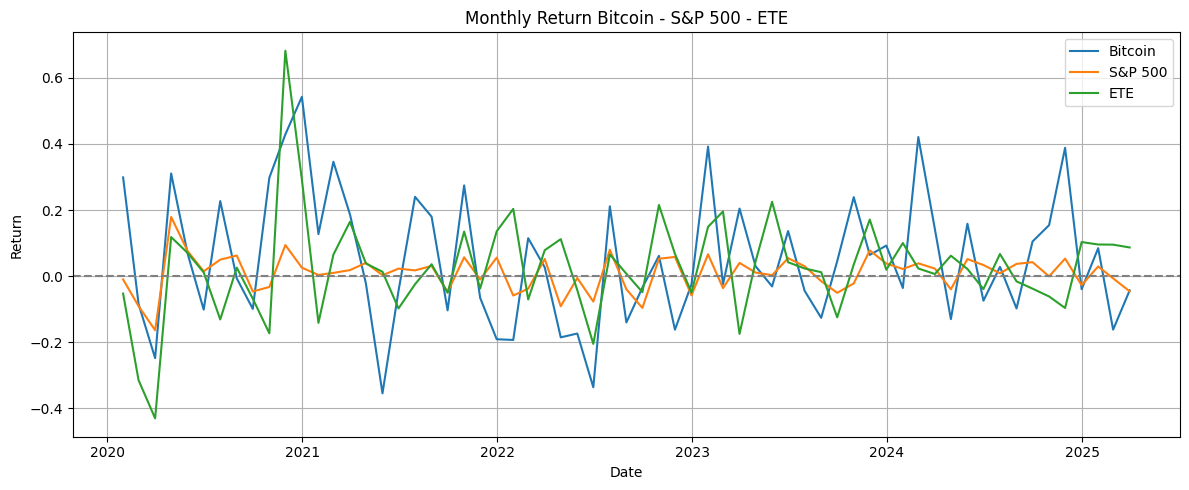

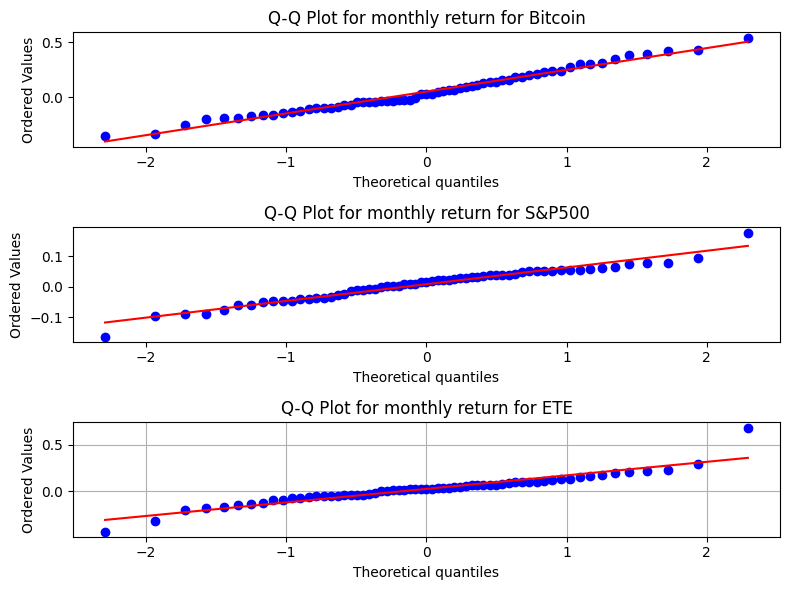

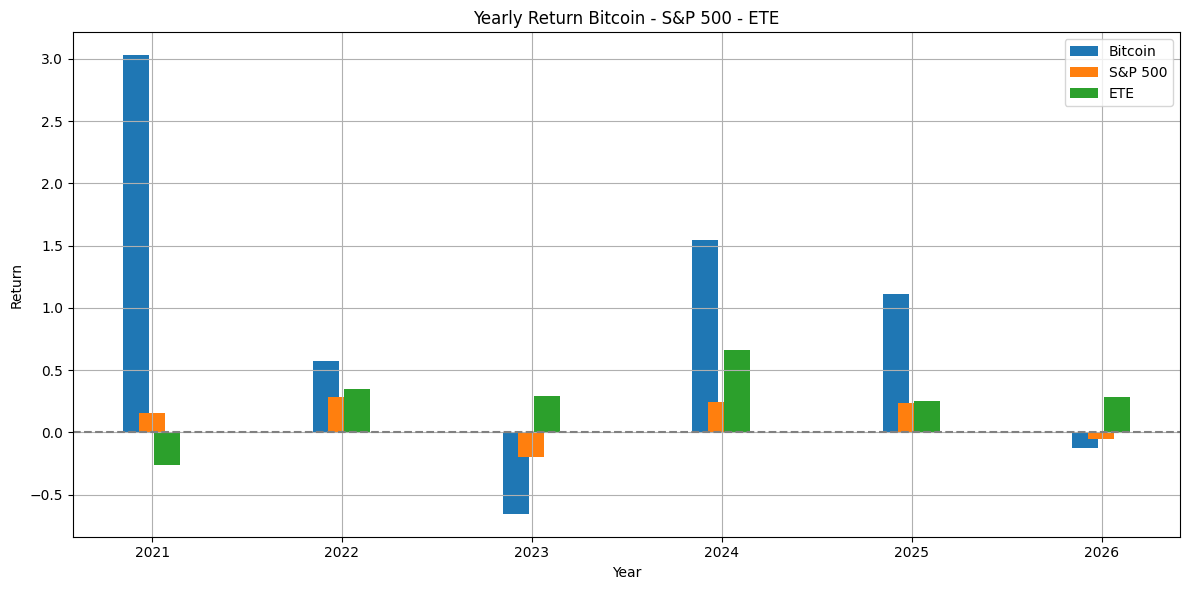

In [ ]:
#Daily return for every stock
btc['Daily Return'] = btc['Adj Close'].pct_change()
sp500['Daily Return'] = sp500['Adj Close'].pct_change()
ete['Daily Return'] = ete['Adj Close'].pct_change()

#Monthly return using .resample()
btc_monthly_return = btc['Adj Close'].resample('ME').apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
sp500_monthly_return = sp500['Adj Close'].resample('ME').apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
ete_monthly_return = ete['Adj Close'].resample('ME').apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

#Yearly return using .resample()
btc_yearly_return = btc['Adj Close'].resample('YE').apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
sp500_yearly_return = sp500['Adj Close'].resample('YE').apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
ete_yearly_return = ete['Adj Close'].resample('YE').apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])



print("\n Daily Return (Bitcoin):")
print(btc[['Adj Close', 'Daily Return']].dropna().head())

print("\n Daily Return (S&P500):")
print(sp500[['Adj Close', 'Daily Return']].dropna().head())

print("\n Daily Return (ETE):")
print(ete[['Adj Close', 'Daily Return']].dropna().head())

print("\n Monthly Return Bitcoin:")
print(btc_monthly_return.head())

print("\n Monthly Return S&P500:")
print(sp500_monthly_return.head())

print("\n Monthly Return ETE:")
print(ete_monthly_return.head())

print("\n Yearly Return Bitcoin:")
print(btc_yearly_return.head())

print("\n Yearly Return S&P500:")
print(sp500_yearly_return.head())

print("\n Yearly Return ETE:")
print(ete_yearly_return.head())



#Line plot
plt.figure(figsize=(12, 5))
plt.plot(btc_monthly_return.index, btc_monthly_return, label='Bitcoin')
plt.plot(sp500_monthly_return.index, sp500_monthly_return, label='S&P 500')
plt.plot(ete_monthly_return.index, ete_monthly_return, label='ETE')
plt.title('Monthly Return Bitcoin - S&P 500 - ΕΤΕ')
plt.xlabel('Date')
plt.ylabel('Return')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("monthly_return.png", bbox_inches='tight')
plt.show()

#Q-Q Plot for monthly return
plt.figure(figsize=(8, 6))
plt.subplot(3,1,1)
stats.probplot(btc_monthly_return.dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot for monthly return for Bitcoin")
plt.subplot(3,1,2)
stats.probplot(sp500_monthly_return.dropna(),dist='norm', plot=plt)
plt.title('Q-Q Plot for monthly return for S&P500')
plt.subplot(3,1,3)
stats.probplot(ete_monthly_return.dropna(), dist='norm', plot=plt)
plt.title('Q-Q Plot for monthly return for ΕΤΕ')
plt.grid(True)
plt.tight_layout()
#plt.savefig("Q-Q_Plot_for_monthly_return.png")
plt.show()



dates = pd.date_range(start="2020-01-01", periods=5, freq='YE')

btc_dates = btc_yearly_return.index - pd.Timedelta(days=30)
ete_dates = ete_yearly_return.index + pd.Timedelta(days=30)

btc_x = mdates.date2num(btc_dates)
sp500_x = mdates.date2num(sp500_yearly_return.index)
ete_x = mdates.date2num(ete_dates)

width = 50

plt.figure(figsize=(12, 6))
plt.bar(btc_x, btc_yearly_return.values, width=width, label='Bitcoin')
plt.bar(sp500_x, sp500_yearly_return.values, width=width, label='S&P 500')
plt.bar(ete_x, ete_yearly_return.values, width=width, label='ETE')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis_date()

#Bar plot
plt.title('Yearly Return Bitcoin - S&P 500 - ΕΤΕ')
plt.xlabel('Year')
plt.ylabel('Return')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("yearly_return.png", bbox_inches='tight')
plt.show()

Επόμενος υπολογισμός είναι αυτός της μηνιαίας μεταβλητότητας(volatility), ο οποίος μετράει την τυπική απόκλιση της απόδοσης κάθε περιουσιακού στοιχείου. Προσεγγίζουμε την ετήσια μεταβλητότητα με μηνιαία δεδομένα. Υπολογίζεται ως $$ {σ_τ} =  \sqrt{ \frac{1}{n - 1} \sum_{t=1}^{n} \left( R_t - \frac{1}{n} \sum_{t=1}^{n} R_t \right)^2 } \cdot \sqrt{n'}
$$
όπου ${σ_t}$ είναι η μεταβλητότητα, η οποία εξαρτάται από τη χρονική περίοδο που επιλέγεται (π.χ.μηνιαία),${n}$ είναι το πλήθος των χρονικών περιόδων των αποδόσεων στο δείγμα, και ${n'}$ είναι το πλήθος των αντίστοιχων χρονικών περιόδων σε ένα έτος (π.χ.12 για μηνιαία).

Το αποτέλεσμα οπτικοποιείται μέσω ραβδογράμματος, ώστε να συγκριθεί η σχετική αστάθεια του Bitcoin, του S&P 500 και της ΕΤΕ.


 Annualized volatility:
Bitcoin: 0.6750
S&P 500: 0.1908
ETE: 0.5213


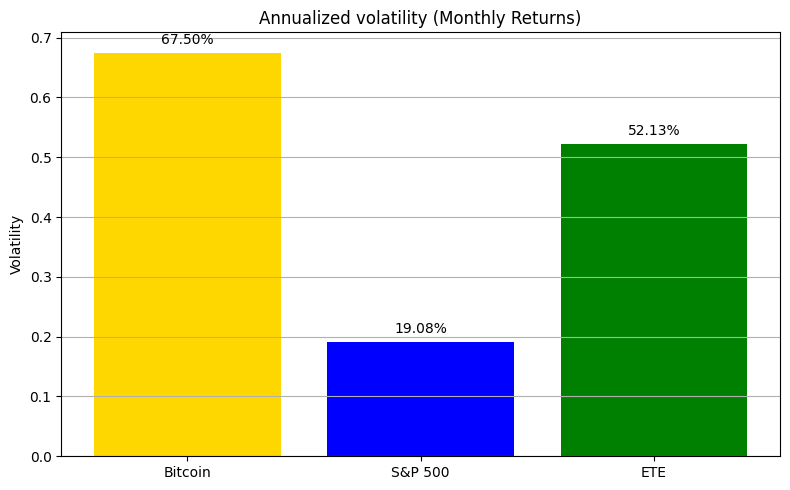

In [ ]:
#Calculate monthly volatility (standard deviation)
btc_vol_monthly = btc_monthly_return.std()
sp500_vol_monthly = sp500_monthly_return.std()
ete_vol_monthly = ete_monthly_return.std()

#Annualized volatility (using √12 for monthly data)
btc_vol_annual = btc_vol_monthly * np.sqrt(12)
sp500_vol_annual = sp500_vol_monthly * np.sqrt(12)
ete_vol_annual = ete_vol_monthly * np.sqrt(12)

print("\n Annualized volatility:")
print(f"Bitcoin: {btc_vol_annual:.4f}")
print(f"S&P 500: {sp500_vol_annual:.4f}")
print(f"ETE: {ete_vol_annual:.4f}")

#Bar plot
assets = ['Bitcoin', 'S&P 500', 'ETE']
volatilities = [btc_vol_annual, sp500_vol_annual, ete_vol_annual]

plt.figure(figsize=(8, 5))
bars = plt.bar(assets, volatilities, color=['gold', 'blue', 'green'])
plt.title('Annualized volatility (Monthly Returns)')
plt.ylabel('Volatility')
plt.grid(axis='y')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2%}", ha='center', va='bottom')

plt.tight_layout()
#plt.savefig("annual_volatility.png", bbox_inches='tight')
plt.show()

Σε αυτό το στάδιο, υπολογίζουμε τον μέσο μηνιαίο απολογισμό αποδόσεων για κάθε περιουσιακό στοιχείο και, στη συνέχεια, προχωρούμε στον υπολογισμό του ετησιοποιημένου Sharpe Ratio. Ο υπολογισμός γίνεται βάσει μηνιαίων αποδόσεων και τα αποτελέσματα παρουσιάζονται σε συγκριτικό πίνακα, που περιλαμβάνει τη μεταβλητότητα, τη μέση απόδοση και το Sharpe Ratio για κάθε στοιχείο. Η εξίσωση που χρησιμοποιείται είναι: $$
S_t = \frac{n' \cdot \left( \frac{1}{n} \sum_{t=1}^{n} R_t - R_f \right)}{\sigma_t}
$$
όπου ${S_t}$ είναι το Sharpe Ratio για την περίοδο ${t}$, ${n}$ ο αριθμός περιόδων ανά έτος (π.χ. 12 για μήνες), ${R_t}$ η απόδοση στη χρονική περίοδο ${t}$, ${R_f}=0$ το επιτόκιο χωρίς κίνδυνο και ${σ_t}$ η ετησιοποιημένη μεταβλητότητα των αποδόσεων.

In [ ]:
#Calculate monthly return mean
btc_mean_monthly_return = btc_monthly_return.mean()
sp500_mean_monthly_return = sp500_monthly_return.mean()
ete_mean_monthly_return = ete_monthly_return.mean()

#Calculate annualized Sharpe Ratio, we assume risk-free rate 0  (n' = 12, Rf = 0)
btc_sharpe = (12 * btc_mean_monthly_return) / btc_vol_annual
sp500_sharpe = (12 * sp500_mean_monthly_return) / sp500_vol_annual
ete_sharpe = (12 * ete_mean_monthly_return) / ete_vol_annual


print("\n Annualized Sharpe Ratio:")
print(f"Bitcoin: {btc_sharpe:.4f}")
print(f"S&P 500: {sp500_sharpe:.4f}")
print(f"ETE: {ete_sharpe:.4f}")


#Creating a comparison table of Sharpe Ratios
sharpe_data = {
    'Asset': ['Bitcoin', 'S&P 500', 'ETE'],
    'Annualized Volatility': [btc_vol_annual, sp500_vol_annual, ete_vol_annual],
    'Mean Monthly Return': [btc_mean_monthly_return, sp500_mean_monthly_return, ete_mean_monthly_return],
    'Sharpe Ratio (annualized)': [btc_sharpe, sp500_sharpe, ete_sharpe]
}

sharpe_df = pd.DataFrame(sharpe_data)
sharpe_df.set_index('Asset', inplace=True)

print("\n Comparison table of Sharpe Ratio:")
display(sharpe_df.style.format({
    'Annualized Volatility': '{:.2%}',
    'Mean Monthly Return': '{:.2%}',
    'Sharpe Ratio (annualized)': '{:.2f}'
}).background_gradient(cmap='Blues', subset=['Sharpe Ratio (annualized)']))





 Annualized Sharpe Ratio:
Bitcoin: 0.9162
S&P 500: 0.5500
ETE: 0.5943

 Comparison table of Sharpe Ratio:


,Annualized Volatility,Mean Monthly Return,Sharpe Ratio (annualized)
Asset,,,
Bitcoin,67.50%,5.15%,0.92
S&P 500,19.08%,0.87%,0.55
ETE,52.13%,2.58%,0.59


Σε αυτό το τμήμα του κώδικα υπολογίζεται η μέγιστη μηνιαία πτώση (Maximum Drawdown) για κάθε περιουσιακό στοιχείο (Bitcoin, S&P 500, ΕΤΕ). Η συνάρτηση calculate_monthly_max_drawdown:



*   Ομαδοποιεί τα ημερήσια δεδομένα σε μηνιαία (resample('ME'))
*   Υπολογίζει για κάθε μήνα τη μέγιστη drawdown τιμή ως εξής:

    *   Για κάθε ημέρα του μήνα, βρίσκει τη μέγιστη τιμή που έχει προηγηθεί (peak)
    *   Υπολογίζει τη μείωση από το peak ως ποσοστό της τιμής κορυφής
    * Παίρνει τη μέγιστη τέτοια μείωση μέσα στον μήνα.





Υπολογίζεται ως εξής:

\begin{align}
H_t &= \max_{2 \leq t \leq n} (P_{t-1}, P_t)  \\
D_t &= \frac{H_t - P_t}{H_t}  \\
MD_t &= \max_{2 \leq t \leq n} D_t
\end{align}
όπου ${H_t}$ η μέγιστη προηγούμενη προσαρμοσμένη τιμή κλεισίματος μέχρι τη χρονική περίοδο ${t}$, ${P_t}$ η προσαρμοσμένη τιμή κλεισίματος στη χρονική τιμή ${t}$, $D_t$ είναι το drawdown της περιόδου $t$ και $MD_t$ είναι η μέγιστη drawdown για όλο το διάστημα που εξετάζεται.



 Monthly Maximum Drawdown (MDD):

Bitcoin:
2020-03-31 00:00:00 0.4551095558983275 
 Date
2020-01-31    0.064293
2020-02-29    0.167203
2020-03-31    0.455110
2020-04-30    0.094352
2020-05-31    0.135630
Freq: ME, Name: Adj Close, dtype: float64

S&P 500:
2020-03-31 00:00:00 0.2852031811628635 
 Date
2020-01-31    0.031265
2020-02-29    0.127558
2020-03-31    0.285203
2020-04-30    0.048007
2020-05-31    0.037605
Freq: ME, Name: Adj Close, dtype: float64

ETE:
2020-03-31 00:00:00 0.6126955056361257 
 Date
2020-01-31    0.073892
2020-02-29    0.321513
2020-03-31    0.612696
2020-04-30    0.172521
2020-05-31    0.222034
Freq: ME, Name: Adj Close, dtype: float64


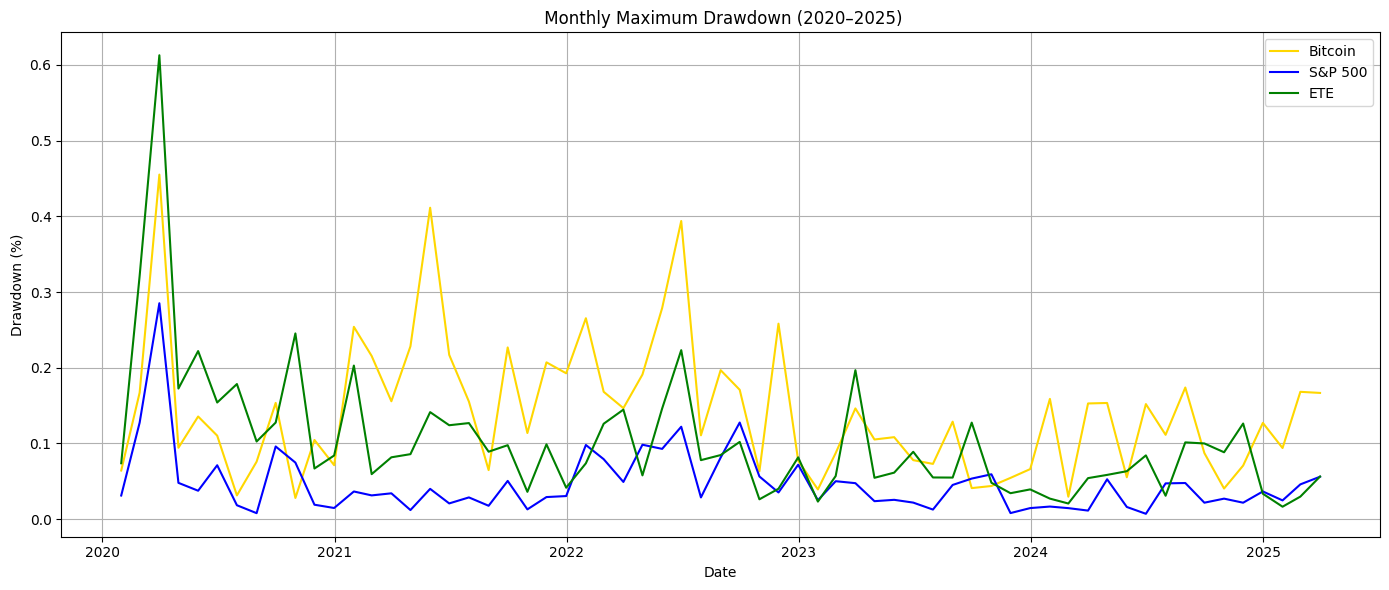

In [ ]:
def calculate_monthly_max_drawdown(prices):
    return prices.resample('ME').apply(lambda x: ((x.cummax() - x) / x.cummax()).max())

#Calculate monthly MDD
btc_monthly_mdd = calculate_monthly_max_drawdown(btc['Adj Close'])
sp500_monthly_mdd = calculate_monthly_max_drawdown(sp500['Adj Close'])
ete_monthly_mdd = calculate_monthly_max_drawdown(ete['Adj Close'])


print("\n Monthly Maximum Drawdown (MDD):")
print("\nBitcoin:")
print(btc_monthly_mdd.idxmax(), btc_monthly_mdd.max(), "\n",btc_monthly_mdd.head())

print("\nS&P 500:")
print(sp500_monthly_mdd.idxmax(), sp500_monthly_mdd.max(), "\n",sp500_monthly_mdd.head())

print("\nETE:")
print(ete_monthly_mdd.idxmax(), ete_monthly_mdd.max(), "\n",ete_monthly_mdd.head())

plt.figure(figsize=(14,6))
plt.plot(btc_monthly_mdd.index, btc_monthly_mdd, label='Bitcoin', color='gold')
plt.plot(sp500_monthly_mdd.index, sp500_monthly_mdd, label='S&P 500', color='blue')
plt.plot(ete_monthly_mdd.index, ete_monthly_mdd, label='ETE', color='green')
plt.title(" Monthly Maximum Drawdown (2020–2025)")
plt.ylabel("Drawdown (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig("Monthly_Maximum_Drawdown.png")
plt.show()

Στο παρακάτω τμήμα του κώδικα  υπολογίζονται η ασυμμετρία (skewness) και η kurtosis, ενώ τα αποτελέσματα απεικονίζονται με ιστογράμματα και κάθετα boxplots. Στον κώδικα:

* Χρησιμοποιούνται οι συναρτήσεις skew() και kurtosis() από τη βιβλιοθήκη scipy.stats για τον υπολογισμό των τιμών skewness και kurtosis αντίστοιχα.

* Τα αποτελέσματα εκτυπώνονται για κάθε περιουσιακό στοιχείο.

* Δημιουργούνται διαγράμματα:

    * Ιστογράμματα για την απεικόνιση της μορφής της κατανομής.

    * Κάθετα boxplots, που παρουσιάζουν συνοπτικά την κατανομή, την ασυμμετρία και την ύπαρξη ακραίων τιμών


Η συνάρτηση για το Skewness ειναι:
\begin{equation}
\text{Skew}_t = \frac{n}{(n - 1)(n - 2)} \sum_{t=1}^{n} \left( \frac{R_t - \bar{R}}{\sigma_t} \right)^3
\end{equation}
όπου ${Skew_t}$  είναι το skewness που εξαρτάται από το χρονικό βήμα συναλλαγής ${t}$.


Η συνάρτηση για το Kurtosis ειναι:
\begin{equation}
\text{Kurt}_t = \frac{n(n+1)}{(n - 1)(n - 2)(n - 3)} \sum_{t=1}^{n} \left( \frac{R_t - \bar{R}}{\sigma_t} \right)^4 - \frac{3(n - 1)^2}{(n - 2)(n - 3)}
\end{equation}
όπου $Kurt_t$ είναι το kurtosis που εξαρτάται από το χρονικό βήμα συναλλαγής ${t}$.


 Skewness of monthly returns:
Bitcoin: 0.3267
S&P 500: -0.2793
ETE: 0.7477

 Kurtosis of monthly returns:
Bitcoin: -0.3605
S&P 500: 1.2451
ETE: 5.3682


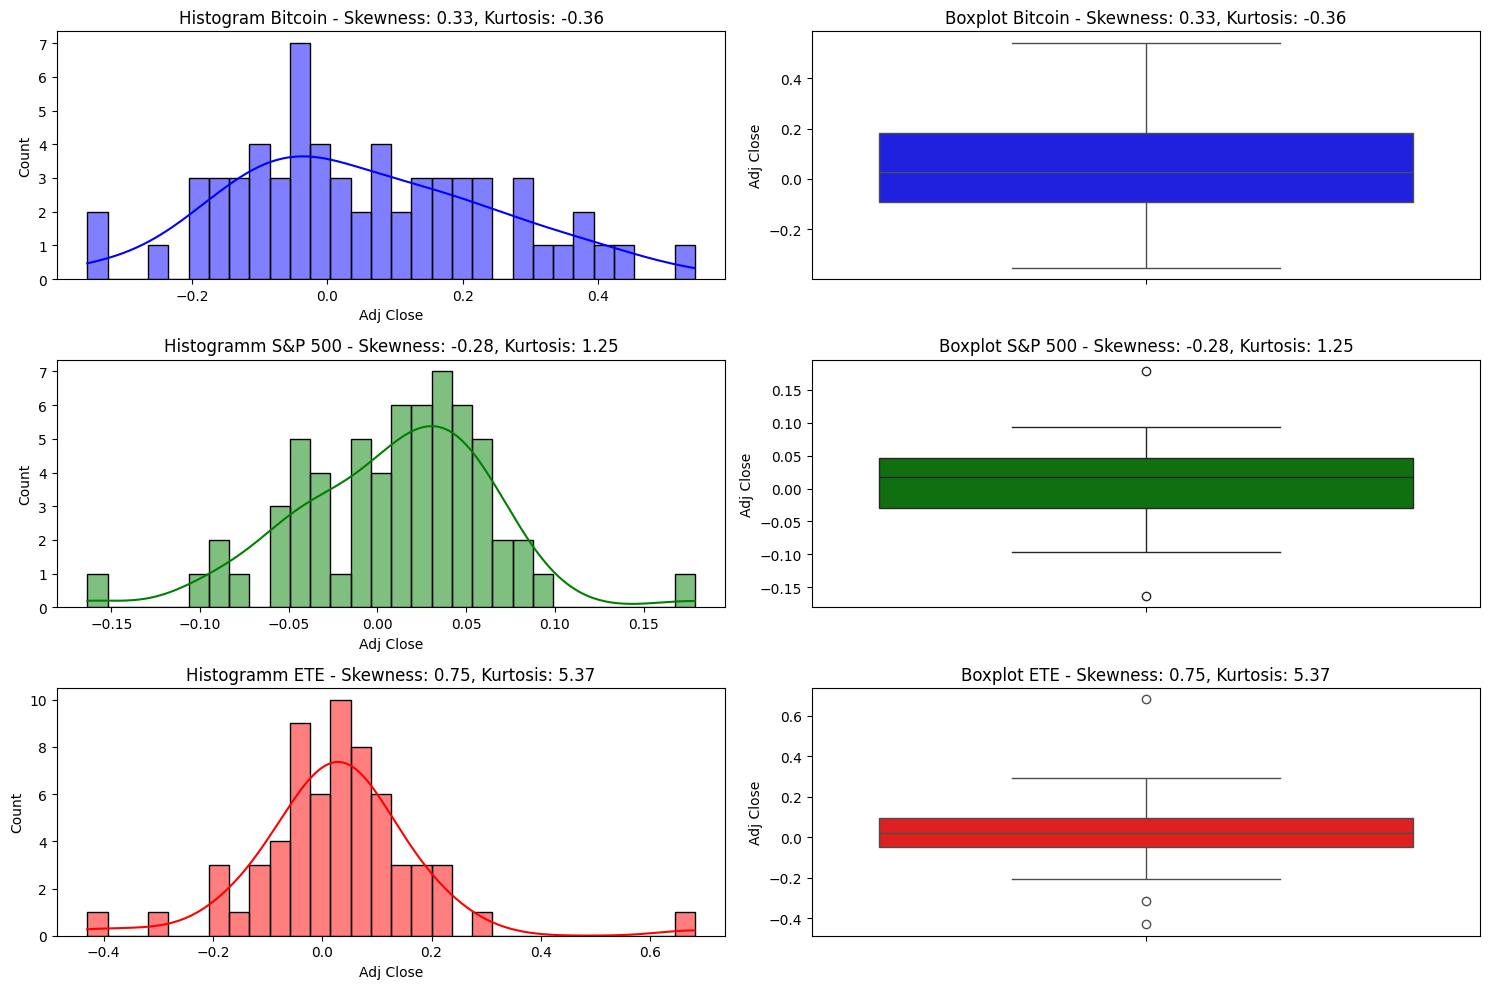

In [ ]:
#Calculate Skewness of monthly returns
btc_skew_monthly = skew(btc_monthly_return.dropna())
sp500_skew_monthly = skew(sp500_monthly_return.dropna())
ete_skew_monthly = skew(ete_monthly_return.dropna())

print("\n Skewness of monthly returns:")
print(f"Bitcoin: {btc_skew_monthly:.4f}")
print(f"S&P 500: {sp500_skew_monthly:.4f}")
print(f"ETE: {ete_skew_monthly:.4f}")


#Calculate kurtosis of monthly returns
btc_kurtosis_monthly = kurtosis(btc_monthly_return.dropna())
sp500_kurtosis_monthly = kurtosis(sp500_monthly_return.dropna())
ete_kurtosis_monthly = kurtosis(ete_monthly_return.dropna())

print("\n Kurtosis of monthly returns:")
print(f"Bitcoin: {btc_kurtosis_monthly:.4f}")
print(f"S&P 500: {sp500_kurtosis_monthly:.4f}")
print(f"ETE: {ete_kurtosis_monthly:.4f}")





#Create plots (Histogram and Boxplot) for each asset
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(btc_monthly_return.dropna(), kde=True, bins=30, color='blue')
plt.title(f'Histogram Bitcoin - Skewness: {btc_skew_monthly:.2f}, Kurtosis: {btc_kurtosis_monthly:.2f}')

plt.subplot(3, 2, 2)
sns.boxplot(y=btc_monthly_return.dropna(), color='blue')
plt.title(f'Boxplot Bitcoin - Skewness: {btc_skew_monthly:.2f}, Kurtosis: {btc_kurtosis_monthly:.2f}')

plt.subplot(3, 2, 3)
sns.histplot(sp500_monthly_return.dropna(), kde=True, bins=30, color='green')
plt.title(f'Histogramm S&P 500 - Skewness: {sp500_skew_monthly:.2f}, Kurtosis: {sp500_kurtosis_monthly:.2f}')

plt.subplot(3, 2, 4)
sns.boxplot(y=sp500_monthly_return.dropna(), color='green')
plt.title(f'Boxplot S&P 500 - Skewness: {sp500_skew_monthly:.2f}, Kurtosis: {sp500_kurtosis_monthly:.2f}')

plt.subplot(3, 2, 5)
sns.histplot(ete_monthly_return.dropna(), kde=True, bins=30, color='red')
plt.title(f'Histogramm ΕΤΕ - Skewness: {ete_skew_monthly:.2f}, Kurtosis: {ete_kurtosis_monthly:.2f}')

plt.subplot(3, 2, 6)
sns.boxplot(y=ete_monthly_return.dropna(), color='red')
#plt.savefig("skewness_kurtosis.png")
plt.title(f'Boxplot ΕΤΕ - Skewness: {ete_skew_monthly:.2f}, Kurtosis: {ete_kurtosis_monthly:.2f}')

plt.tight_layout()
plt.show()
